<a href="https://colab.research.google.com/github/gledsoncarvalho/bigdata-analysis-copa-do-brasil/blob/main/TCC_GLEDSON_PENALTIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jsonlines
!pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 27.5 MB 74.3 MB/s 
     |████████████████████████████████| 14.8 MB 49.1 MB/s 
     |████████████████████████████████| 174 kB 67.2 MB/s 
     |████████████████████████████████| 24.1 MB 1.1 MB/s 
     |████████████████████████████████| 285 kB 62.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=d4f73c67edf6e0cb418f42d2e11071dd3679306c665e2fa7385f453fa5d57e2f
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.8

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import nltk
from textblob import TextBlob
from io import StringIO
import json
from pandas.io.json import json_normalize
import jsonlines

In [ ]:


df = pd.DataFrame()
penaltis = []
with jsonlines.open('/content/drive/MyDrive/coleta/penaltis.jsonl', 'r') as reader:
    for obj in reader.iter(skip_invalid=True, allow_none=True):
        penaltis.append(obj)


In [ ]:
penaltis_df = pd.DataFrame(penaltis)

In [ ]:
# REMOVENDO AS COLUNAS DESNECESSÁRIAS
penaltis_df = penaltis_df.drop(columns=['attachments','conversation_id','edit_history_tweet_ids', 'lang','public_metrics', 'referenced_tweets','reply_settings', 'source', 'author', '__twarc','matching_rules', 'in_reply_to_user_id', 'in_reply_to_user'])
# a.head()
penaltis_df.head()

,author_id,context_annotations,created_at,entities,geo,id,possibly_sensitive,text,withheld
0,1399865653541097473,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-20T02:47:25.000Z,{},{},1582926431528824832,False,Tô ouvindo só a torcida do Corinthians no Mara...,NaN
1,2834978861,NaN,2022-10-20T02:47:24.000Z,"{'annotations': [{'start': 78, 'end': 79, 'pro...",{},1582926429234556929,False,@lucasdsbarros Eu só fico imaginando que se fo...,NaN
2,785944134712516609,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-20T02:47:25.000Z,"{'hashtags': [{'start': 10, 'end': 18, 'tag': ...",{},1582926432464146433,False,Aí meu cu #FLAxCOR #VamosFlamengo,NaN
3,1433490512,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-20T02:47:25.000Z,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",{},1582926433562697731,False,RT @buuhcrf: Sem necessidade alguma de recuar ...,NaN
4,969082505017069570,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-20T02:47:25.000Z,"{'mentions': [{'start': 0, 'end': 15, 'usernam...",{},1582926430698364928,False,"@centraldanacao Além disso, vamos para uma dis...",NaN


                           author_id  context_annotations  entities   geo  \
created_at                                                                  
2022-10-20 02:47:00+00:00       1870                 1663      1870  1870   
2022-10-20 02:48:00+00:00       2985                 2617      2985  2985   
2022-10-20 02:49:00+00:00       2954                 2694      2954  2954   
2022-10-20 02:50:00+00:00       3084                 2900      3084  3084   
2022-10-20 02:51:00+00:00       2998                 2717      2998  2998   
2022-10-20 02:52:00+00:00       3027                 2747      3027  3027   
2022-10-20 02:53:00+00:00       2918                 2573      2918  2918   
2022-10-20 02:54:00+00:00       2868                 2564      2868  2868   
2022-10-20 02:55:00+00:00       2852                 2614      2852  2852   
2022-10-20 02:56:00+00:00       2650                 2403      2650  2650   
2022-10-20 02:57:00+00:00       2927                 2732      2927  2927   

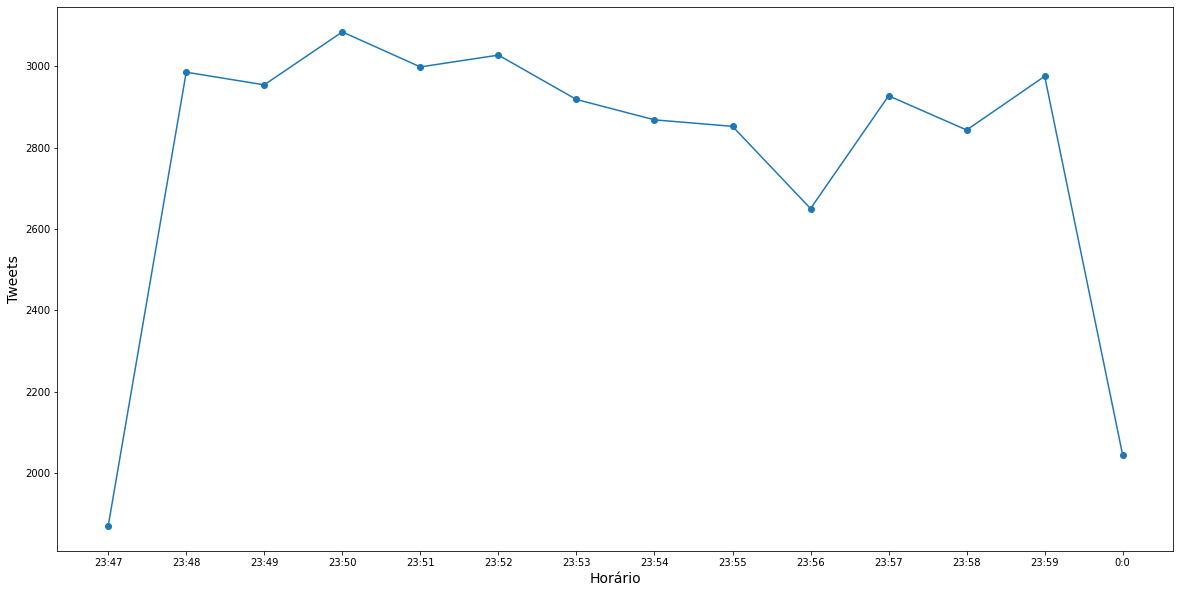

In [ ]:
penaltis_df = penaltis_df.sort_values(by=['created_at'])
penaltis_df["created_at"] = penaltis_df["created_at"].map(pd.Timestamp)
df = penaltis_df.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='1min')).aggregate(func='count')
print(df)
x = []
# tempo = []
for i in df.index:
    i = i.astimezone(tz='America/Sao_Paulo')
    x.append(str(i.hour) + ':' + str(i.minute))
y = df.get(['author_id'])
fig = plt.figure(figsize=(20, 10))
plt.plot(x,y, marker='o')
plt.xlabel("Horário", fontsize=14)
plt.ylabel("Tweets", fontsize=14)
plt.show()


23:56 - Gabigol marca e agita torcida
23:49 - Filipe luis perde penalti
23:58 - Vital perde penalti

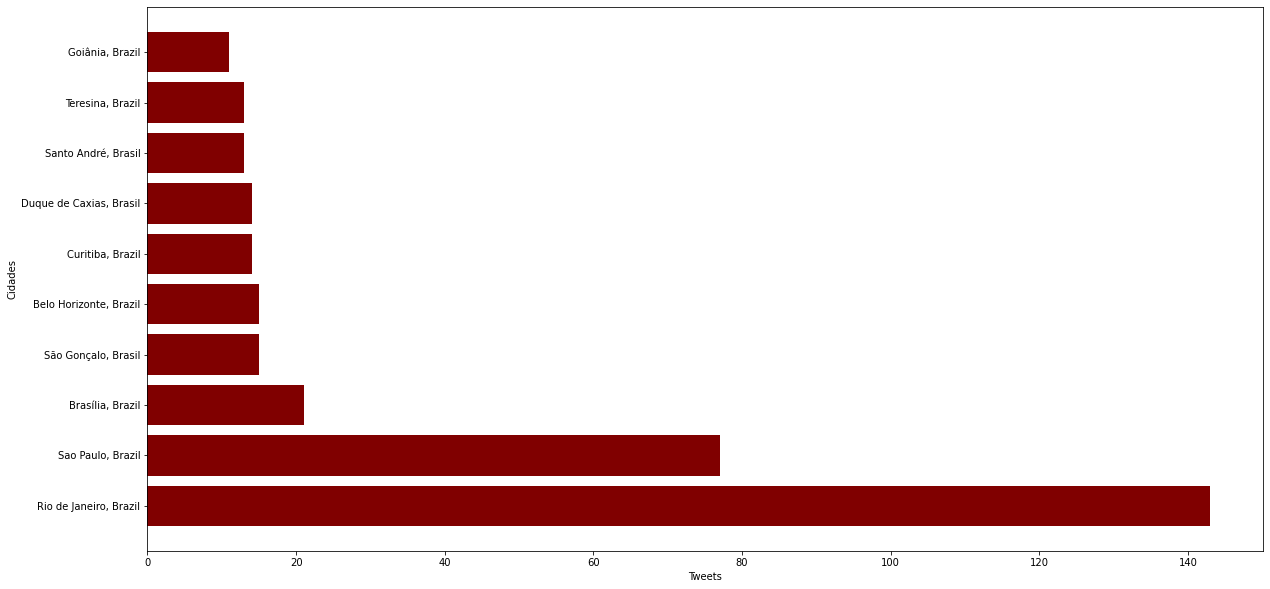

In [ ]:
# COLETA DE LOCALIDADE DOS USUÁRIOS
cidades = []
for i in penaltis_df.get('geo'):
    if (i != {}):
        cidades.append(i['full_name'])

from collections import Counter
contador = Counter(cidades)

a = {}
for k,v in contador.most_common(10):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Tweets")
plt.ylabel("Cidades")
# plt.title("Cid")
plt.show()

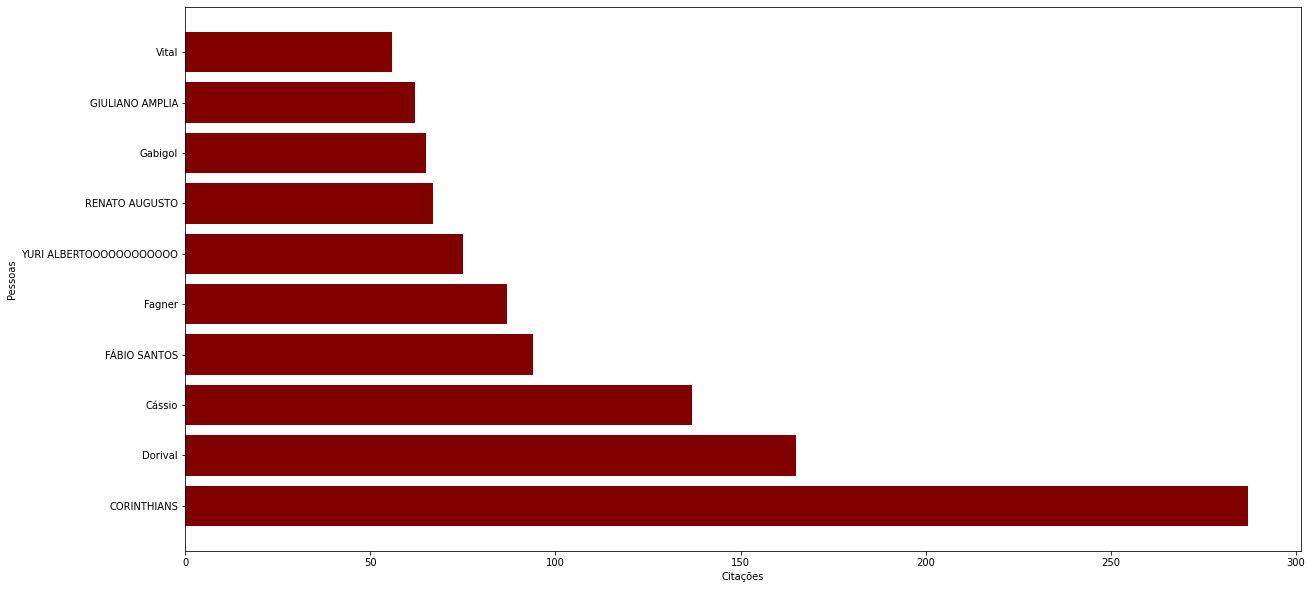

In [ ]:
# PEGANDO ENTITIES - PERSON
palavras_person = []
for i in penaltis_df.get('entities'):
    if (i.get('annotations') != None):
        for j in i.get('annotations'):
            if(j.get('type') == 'Person'):
                # print(j.get('normalized_text'))
                palavras_person.append(j.get('normalized_text'))

from collections import Counter
contador = Counter(palavras_person)
# for i in contador.items():
#     print(i)
a = {}
for k,v in contador.most_common(10):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Citações")
plt.ylabel("Pessoas")
# plt.title("Cid")
plt.show()

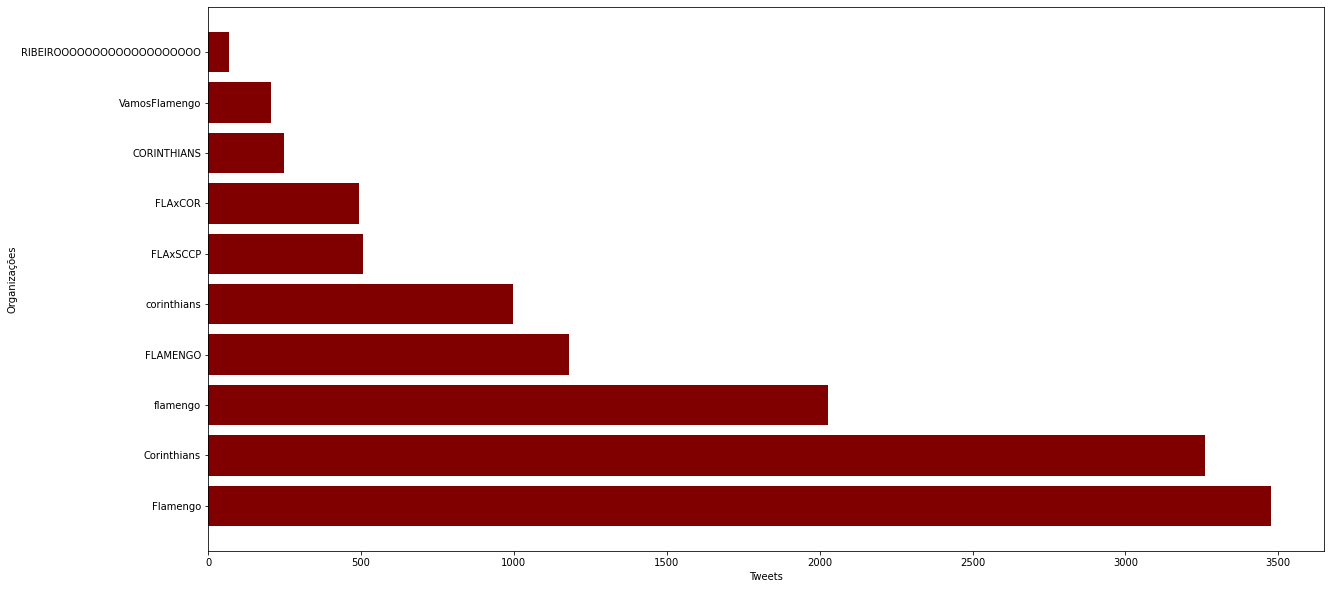

In [ ]:
# PEGANDO ENTITIES - ORGANIZATION
palavras_organization = []
teste = []
for i in penaltis_df.get('entities'):
    if (i.get('annotations') != None):
        for j in i.get('annotations'):
            if(j.get('type') == 'Organization'):
                # print(j.get('normalized_text'))
                palavras_organization.append(j.get('normalized_text'))

from collections import Counter
contador = Counter(palavras_organization)
# for i in contador.items():
#     print(i)
a = {}
for k,v in contador.most_common(10):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Tweets")
plt.ylabel("Organizações")
# plt.title("Cid")
plt.show()

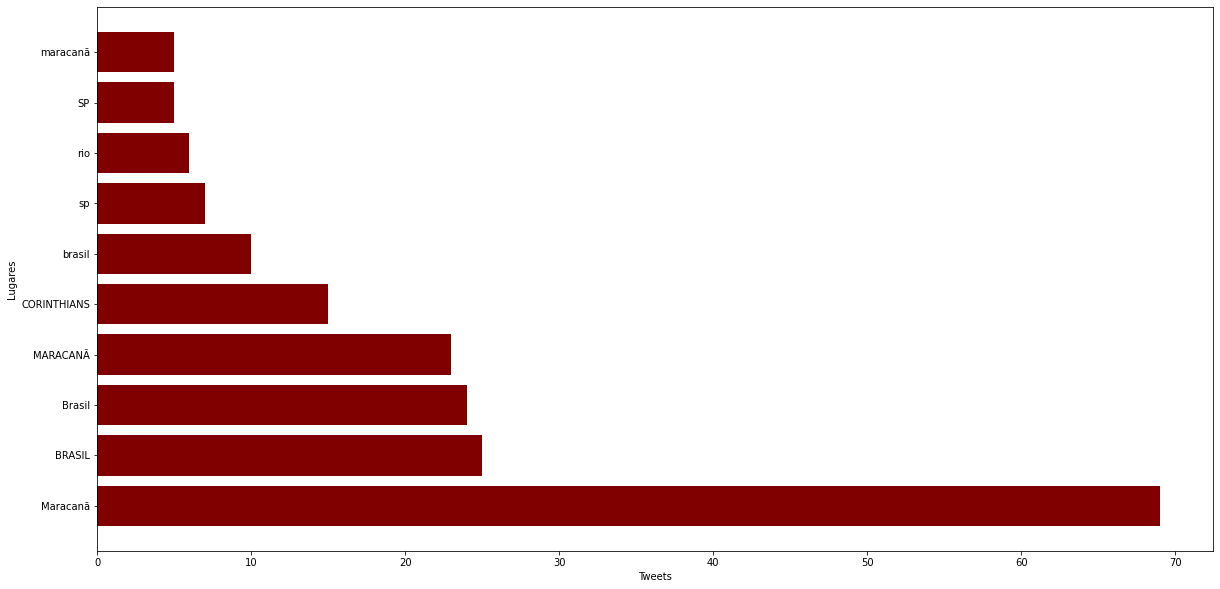

In [ ]:
# PEGANDO ENTITIES - PLACE
palavras_place = []
for i in penaltis_df.get('entities'):
    if (i.get('annotations') != None):
        for j in i.get('annotations'):
            if(j.get('type') == 'Place'):
                # print(j.get('normalized_text'))
                palavras_place.append(j.get('normalized_text'))

from collections import Counter
contador = Counter(palavras_place)
# for i in contador.items():
#     print(i)
a = {}
for k,v in contador.most_common(10):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Tweets")
plt.ylabel("Lugares")
# plt.title("Cid")
plt.show()

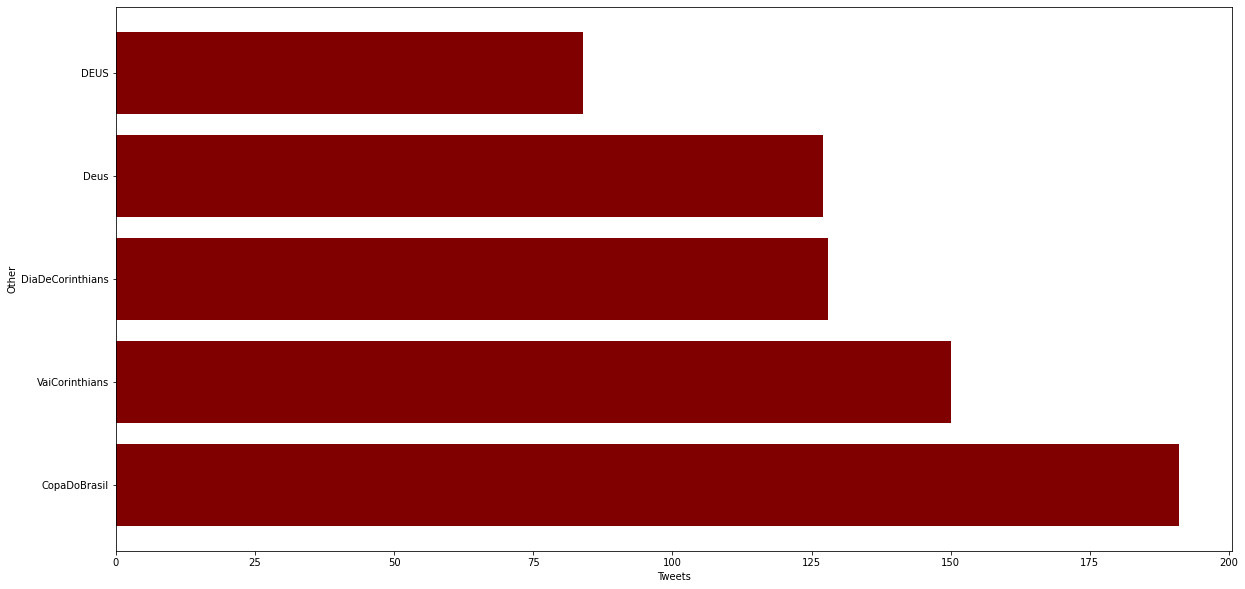

In [ ]:
# PEGANDO ENTITIES - OTHERS
palavras_other = []
for i in penaltis_df.get('entities'):
    if (i.get('annotations') != None):
        for j in i.get('annotations'):
            if(j.get('type') == 'Other'):
                # print(j.get('normalized_text'))
                palavras_other.append(j.get('normalized_text'))

from collections import Counter
contador = Counter(palavras_other)
# for i in contador.items():
#     print(i)
a = {}
for k,v in contador.most_common(5):
    a[k] = v

x = list(a.keys())
y = list(a.values())

fig = plt.figure(figsize=(20, 10))
plt.barh(x, y, color='maroon')
plt.xlabel("Tweets")
plt.ylabel("Other")
# plt.title("Cid")
plt.show()

In [ ]:
def tokenize(text):
    return text.split()

class LBC:

    booster_words = [
            'muito',
            'super',
    ]

    downtoner_words = [
            'pouco',
            'apenas'
    ]

    negative_words = [
            'não',
            'nem'
    ]

    BOOST_POLARITY = 3

    def __init__(self, sentiment_lexicon_file):
        self.sentiment_lexicon = self.read_lexicon(
                self.liwc_reader, sentiment_lexicon_file)

    def read_lexicon(self, reader, lexicon_file):
        return reader(lexicon_file)

    def liwc_reader(self, lexicon_file):
        sentiment_lex = {}
        posemo = '126'
        negemo = '127'
        words_tags = open(lexicon_file, 'r').readlines()[66:]
        for entry in words_tags:
            w_tags = entry.split('\t')
            word = w_tags[0]
            if word[-1] != '*' \
                    and word not in self.booster_words \
                    and word not in self.downtoner_words \
                    and word not in self.negative_words:
                if posemo in w_tags:
                    sentiment_lex[word] = 1
                elif negemo in w_tags:
                    sentiment_lex[word] = -1
        return sentiment_lex

    def get_polarity(self, word):
        if word in self.sentiment_lexicon:
            return self.sentiment_lexicon[word]
        return 0

    def context_polarity(self, tokens, sent_word_idx):
        negation = False
        booster = False
        downtoner = False
        sentiment_word = tokens[sent_word_idx]
        word_polarity = self.get_polarity(sentiment_word)
        if len(list(set(tokens[:sent_word_idx]) &
                    set(self.negative_words))) > 0:
            negation = True
        if len(list(set(tokens[:sent_word_idx]) &
                    set(self.booster_words))) > 0:
            booster = True
        if len(list(set(tokens[:sent_word_idx]) &
                    set(self.downtoner_words))) > 0:
            downtoner = True
        if negation:
            if downtoner:
                return self.BOOST_POLARITY * word_polarity
            if booster:
                return 1 / self.BOOST_POLARITY * word_polarity
            return -1 * word_polarity
        elif booster:
            return self.BOOST_POLARITY * word_polarity
        elif downtoner:
            return 1 / self.BOOST_POLARITY * word_polarity
        return word_polarity

    def classify(self, text):
        tokens = tokenize(text)
        return sum([self.context_polarity(tokens, idx)
                    for idx in range(len(tokens))])


In [ ]:
classifier = LBC('/content/data/MyDrive/coleta/LIWC2007_Portugues_win.dic.txt')
text = ''
result = classifier.classify(text)
print(text + '\t' + str(result))

	0


In [ ]:
# MONTANDO NUVEM DE PALAVRAS
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def pre_processamento(texto):
  
    # seleciona apenas letras e coloca todas em minúsculo 
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

from enelvo.normaliser import Normaliser

# instanciando
norm = Normaliser(tokenizer='readable')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

textos = []
# jogo1_df.get('text')
sentiments = []

for i in penaltis_df.get('text'):
    
    text = re.sub(r'https\S+', '', i)
    text = re.sub(r'RT', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'kkk\S+', '', text)
    # text = text.replace('\n', ' ')
    # text = text.lower()
    # text = text.translate(str.maketrans('', '', string.punctuation) )
    # frase = text.strip().split(' ')
    frase = word_tokenize(text)

    nova_frase = ''
    # print('TEXT:: ' + text)
    if (text != '' or text != ' '):
        try:
            for j in frase:
                nova_frase = nova_frase + ' ' + norm.normalise(j)
            # print('NOVA:: ' +nova_frase)
            text = pre_processamento(nova_frase)
            sentiments.append(str(classifier.classify(text)))
        except:
            print('ERRO')
a = penaltis_df
a['sentiment'] = sentiments
a.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
ERROR:enelvo.normaliser:Failed to normalise word "akakakkaakkaka"!
ERROR:enelvo.normaliser:Failed to normalise word "peloamordedeus"!
ERROR:enelvo.normaliser:Failed to normalise word "kinnporsche"!
ERROR:enelvo.normaliser:Failed to normalise word "dorrrmrirrr"!
ERROR:enelvo.normaliser:Failed to normalise word "nervooosooo"!
ERROR:enelvo.normaliser:Failed to normalise word "peloamordedeus"!
ERROR:enelvo.normaliser:Failed to normalise word "midnights"!
ERROR:enelvo.normaliser:Failed to normalise word "foguetaiada"!
ERROR:enelvo.normaliser:Failed to normalise word "krlhhh"!
ERROR:enelvo.normaliser:Failed to normalise word "karalbooo"!
ERROR:enelvo.normaliser:Failed to normalise word "djhdhdjjdhd"!
ERROR:enelvo.normaliser:Failed to normalise word "midnights"!
ERROR:enelvo.norm

,author_id,context_annotations,created_at,entities,geo,possibly_sensitive,text,withheld,sentiment
1,2834978861,NaN,2022-10-20 02:47:24+00:00,"{'annotations': [{'start': 78, 'end': 79, 'pro...",{},False,@lucasdsbarros Eu só fico imaginando que se fo...,NaN,1
6,835243302714818561,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-20 02:47:24+00:00,{},{},False,Flamengo ou Corinthians nos pênaltis? acho que...,NaN,0
7,1561456264500109317,NaN,2022-10-20 02:47:24+00:00,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",{},False,@hopespallett A PRIMEIRA FOTO,NaN,0
9,1136019078370476038,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-20 02:47:24+00:00,{},{},False,VAMOS CORINTHIANS,NaN,0
26,757310129368948736,"[{'domain': {'id': '6', 'name': 'Sports Event'...",2022-10-20 02:47:24+00:00,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",{},False,RT @giraltpablo: El Maracaná es un infierno. F...,NaN,-1


In [ ]:
positivo = a.query("sentiment > '0'")
neutro = a.query("sentiment == '0' or sentiment == '0.0'")
negativo = a.query("sentiment < '0'")
neutro.count()

author_id              21746
context_annotations    19543
created_at             21746
entities               21746
geo                    21746
possibly_sensitive     21746
text                   21746
withheld                   0
sentiment              21746
dtype: int64

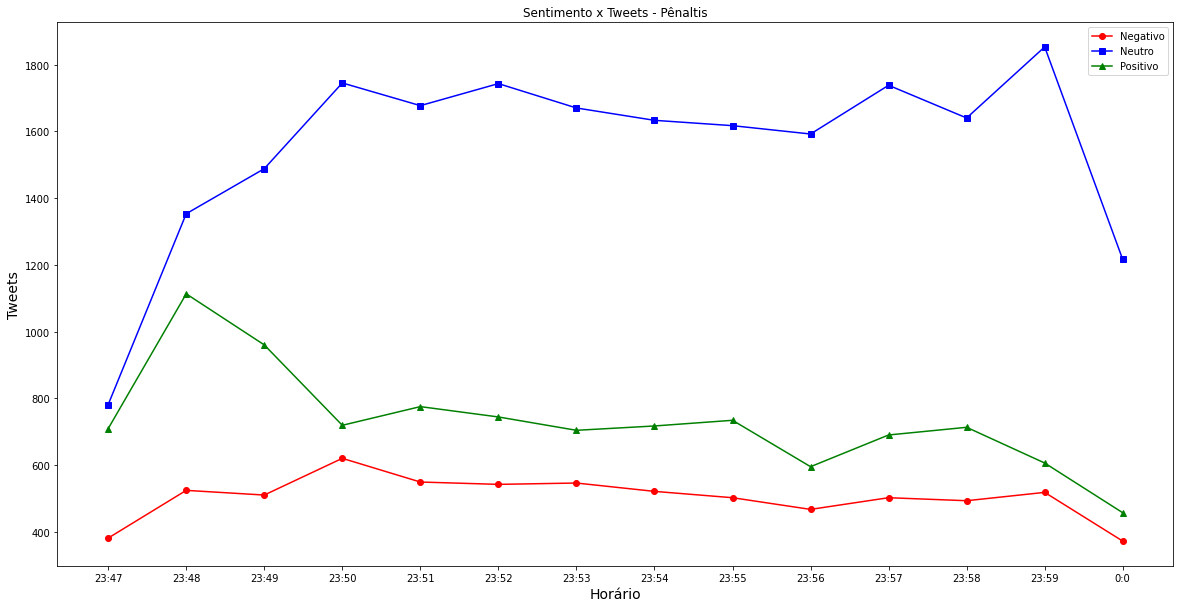

In [ ]:
positivo = positivo.sort_values(by=['created_at'])
positivo["created_at"] = positivo["created_at"].map(pd.Timestamp)
df_pos = positivo.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='1min')).aggregate(func='count')

negativo = negativo.sort_values(by=['created_at'])
negativo["created_at"] = negativo["created_at"].map(pd.Timestamp)
df_neg = negativo.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='1min')).aggregate(func='count')

neutro = neutro.sort_values(by=['created_at'])
neutro["created_at"] = neutro["created_at"].map(pd.Timestamp)
df_neu = neutro.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='1min')).aggregate(func='count')

x = []
x_neg = []
x_neu = []
# tempo = []
for i in df_pos.index:
    i = i.astimezone(tz='America/Sao_Paulo')
    x.append(str(i.hour) + ':' + str(i.minute))

for i in df_neg.index:
    i = i.astimezone(tz='America/Sao_Paulo')
    x_neg.append(str(i.hour) + ':' + str(i.minute))

for i in df_neu.index:
    i = i.astimezone(tz='America/Sao_Paulo')
    x_neu.append(str(i.hour) + ':' + str(i.minute))

y = df_pos.get(['author_id'])
y_neg = df_neg.get(['author_id'])
y_neu = df_neu.get(['author_id'])

fig = plt.figure(figsize=(20, 10))
plt.plot(x_neg,y_neg,color='red', label='Negativo', marker='o')
plt.plot(x_neu,y_neu, color='blue', label='Neutro', marker='s')
plt.plot(x,y, color='green', label='Positivo', marker='^')
plt.xlabel("Horário", fontsize=14)
plt.ylabel("Tweets", fontsize=14)
plt.title("Sentimento x Tweets - Pênaltis")
plt.legend()
plt.show()

In [ ]:
# EXTRAÇÃO DE TEXTO PARA ANALISE DE SENTIMENTO
textos = []
for i in jogo1_tempo1_df.get('text'):
    textos.append(i)



NameError: ignored

In [ ]:
# SEGUNDO JOGO

df2 = pd.DataFrame()
d2 = []
with jsonlines.open('/content/segundo_jogo_primeiro_tempo.jsonl', 'r') as reader:
    for obj in reader.iter(skip_invalid=True, allow_none=True):
        d2.append(obj)

# with jsonlines.open('/content/primeiro_jogo_primeiro_tempo2.jsonl', 'r') as reader:
#     for obj in reader.iter(skip_invalid=True, allow_none=True):
#         d2.append(obj)

In [ ]:
df2 = pd.DataFrame(d2)

In [ ]:
df_2 = df2.drop(columns=['attachments','conversation_id',
       'edit_history_tweet_ids', 'id', 'lang',
        'public_metrics', 'referenced_tweets',
       'reply_settings', 'source', 'author', '__twarc',
       'matching_rules', 'in_reply_to_user_id', 'in_reply_to_user'])

In [ ]:
a = df_2.sort_values(by=['created_at'])

a["created_at"] = a["created_at"].map(pd.Timestamp)
a.head()

c = a.groupby(pd.Grouper(key='created_at', axis=0, 
                      freq='5min')).aggregate(func='count')
c